In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [23]:
df=pd.read_csv('Glass Identification.csv')

In [24]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [25]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [26]:
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

This data set contains 214 rows and 11 columns and we dont have any null value present in the data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


All th columns have integer and float datatypes so we will not need to encode any data

In [28]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


There is slight variation in mean and mdeian where as in K there is huge difference between 75% and the max value which indicates the presence of outliers

In [29]:
dfcor=df.corr()
dfcor

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


<Axes: >

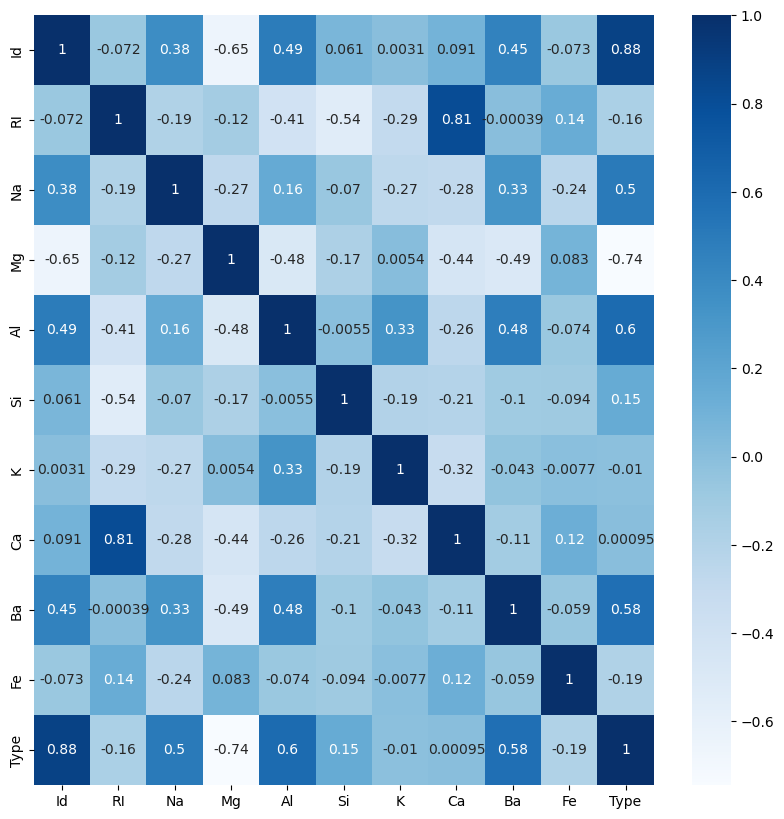

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcor,cmap="Blues",annot=True)

In [31]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [33]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps


MOst of the glasses are of type 1 and 2

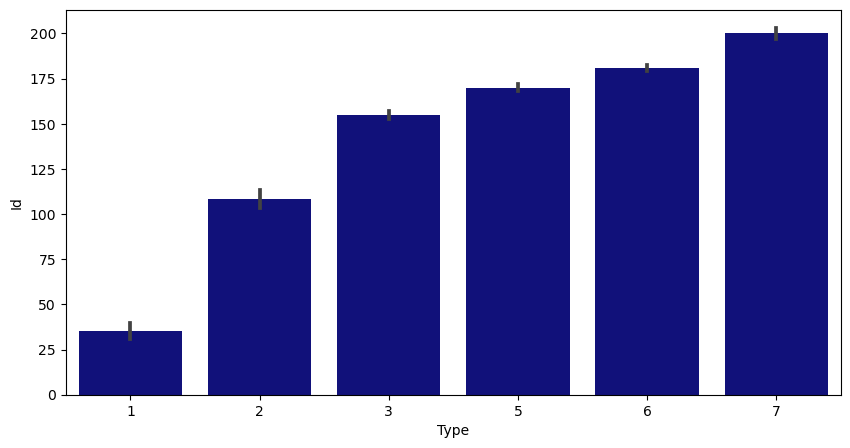

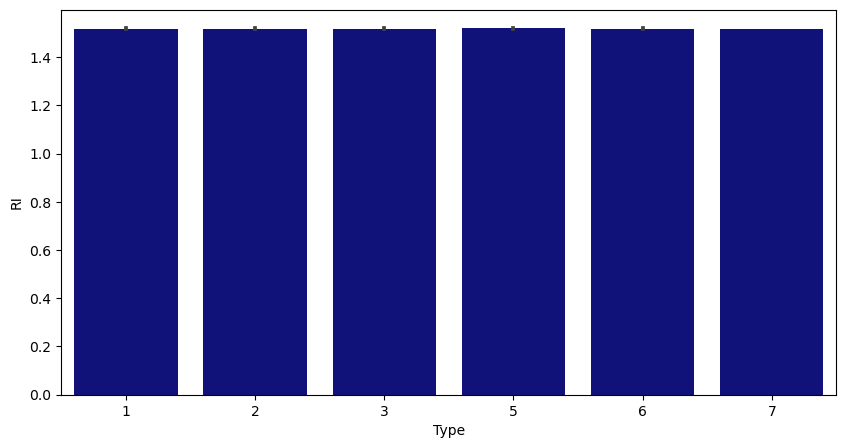

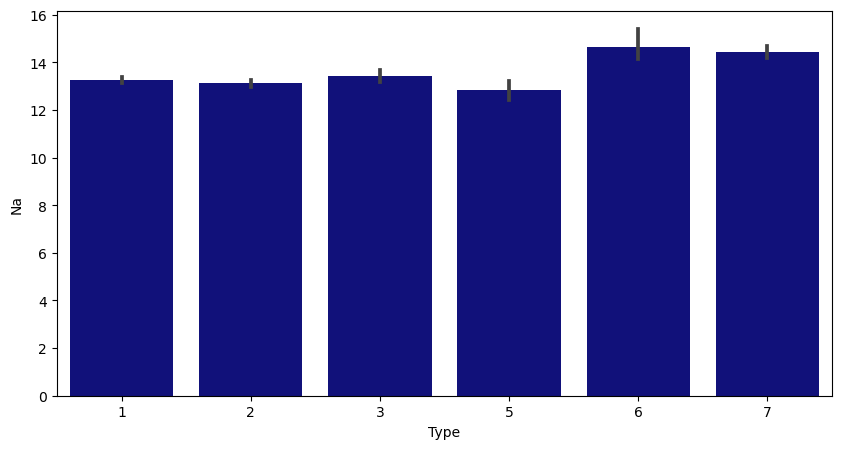

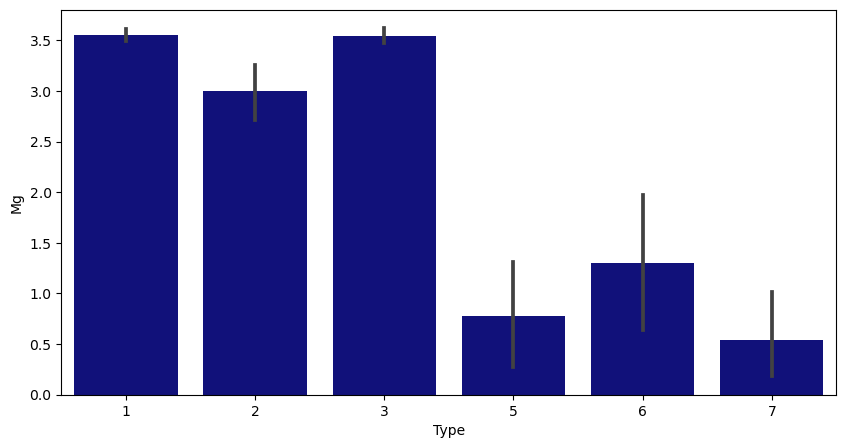

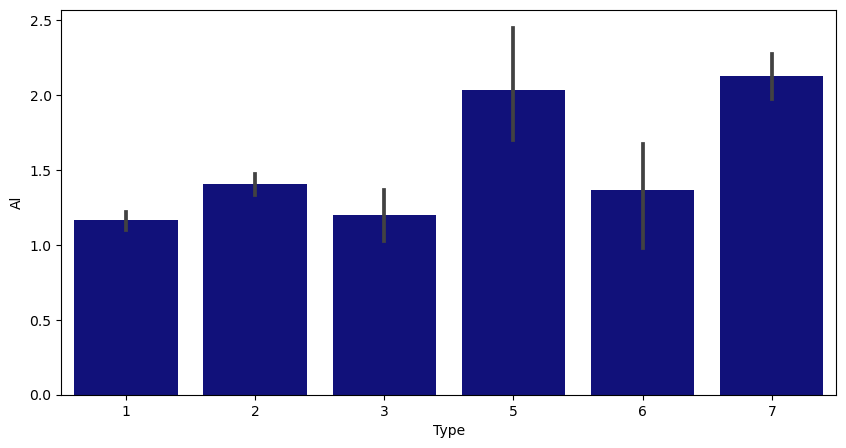

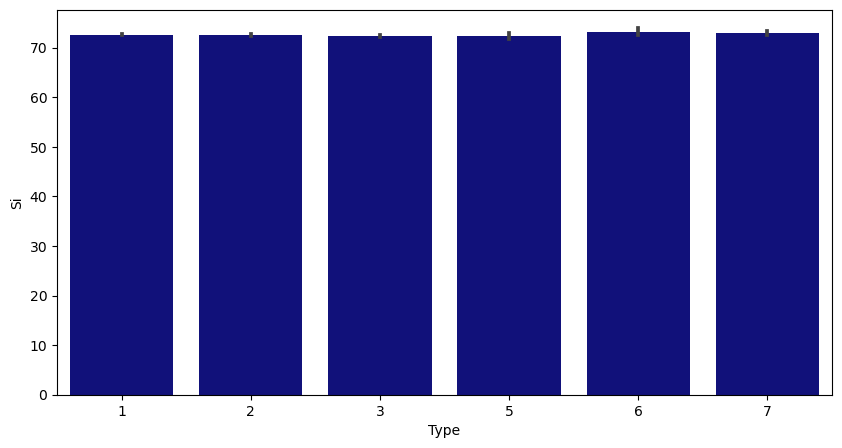

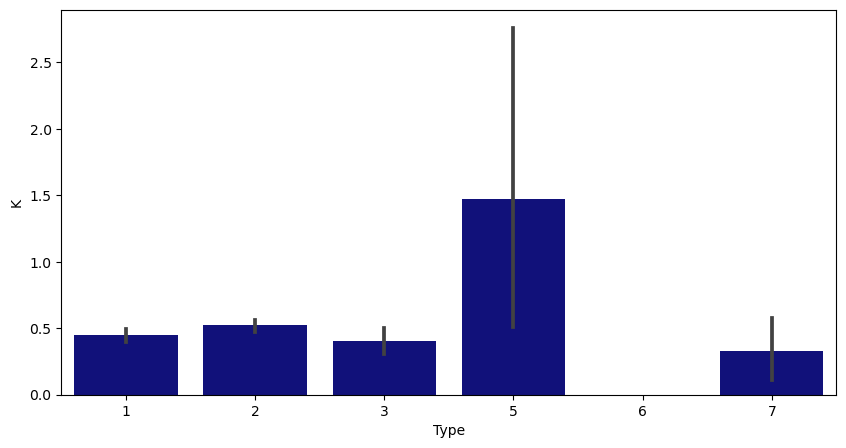

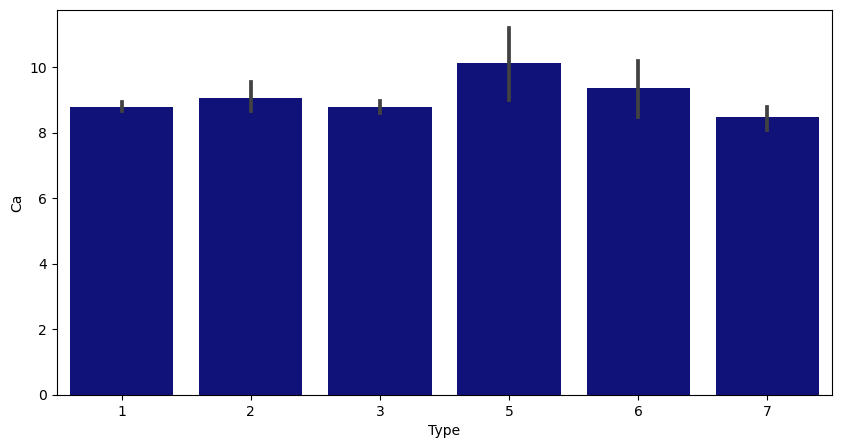

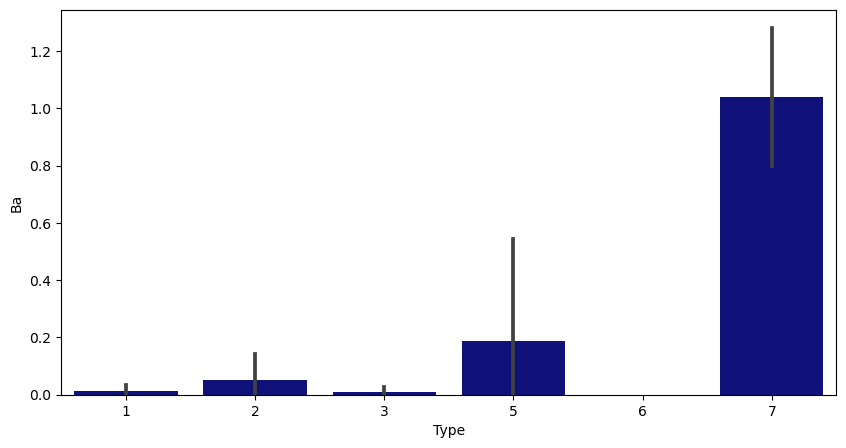

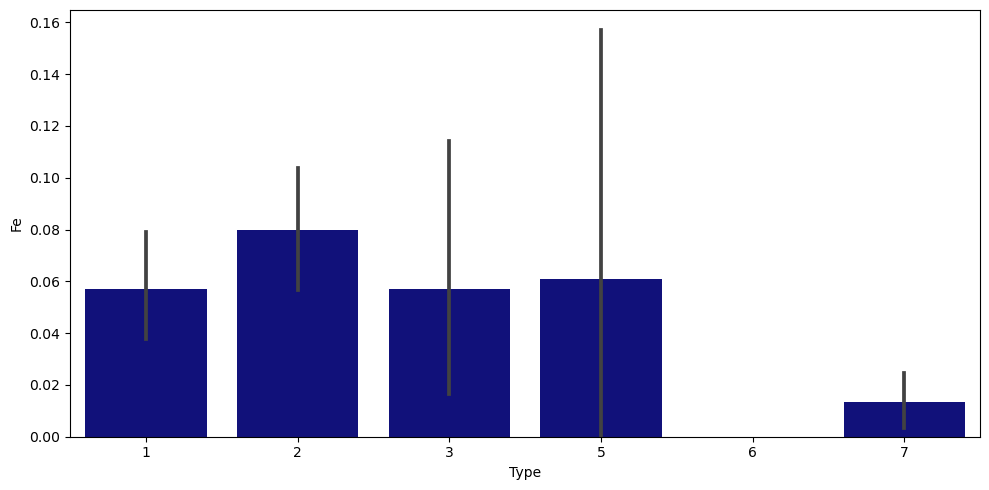

In [34]:
index=0
labels = df['Type']
features = df.drop('Type', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="Darkblue")
plt.tight_layout()
plt.show()

We can see the RI,Si is pretty much same for all the types 

Id         Axes(0.125,0.53;0.110714x0.35)
RI      Axes(0.257857,0.53;0.110714x0.35)
Na      Axes(0.390714,0.53;0.110714x0.35)
Mg      Axes(0.523571,0.53;0.110714x0.35)
Al      Axes(0.656429,0.53;0.110714x0.35)
Si      Axes(0.789286,0.53;0.110714x0.35)
K          Axes(0.125,0.11;0.110714x0.35)
Ca      Axes(0.257857,0.11;0.110714x0.35)
Ba      Axes(0.390714,0.11;0.110714x0.35)
Fe      Axes(0.523571,0.11;0.110714x0.35)
Type    Axes(0.656429,0.11;0.110714x0.35)
dtype: object

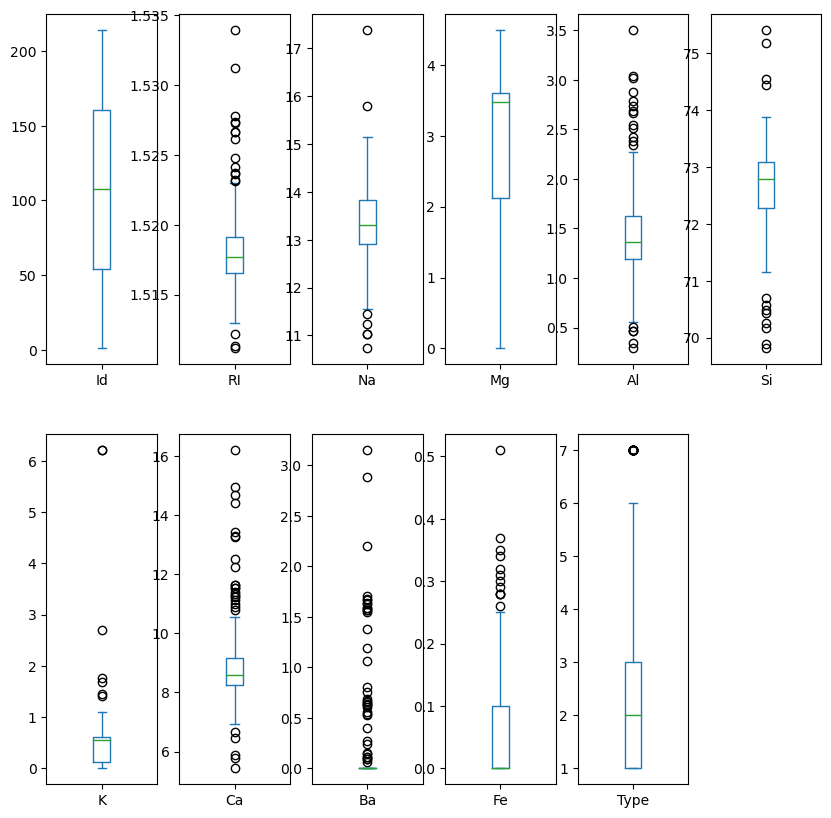

In [35]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

We can see the presence of oultiers in RI,Na,Al,Si,Ba,Ca,Fe etc

In [36]:
df.skew()

Id      0.000000
RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

<Axes: xlabel='RI', ylabel='Density'>

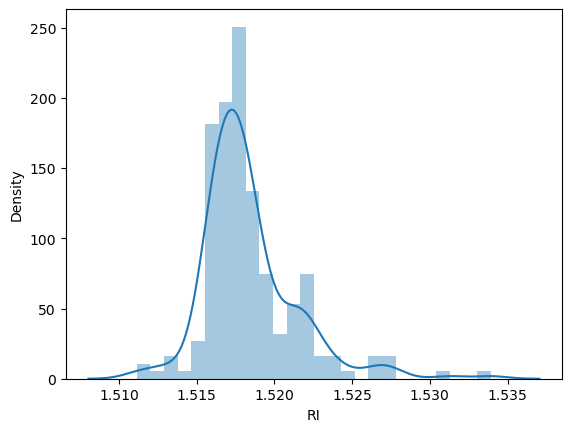

In [37]:
sns.distplot(df['RI'])

<Axes: xlabel='Na', ylabel='Density'>

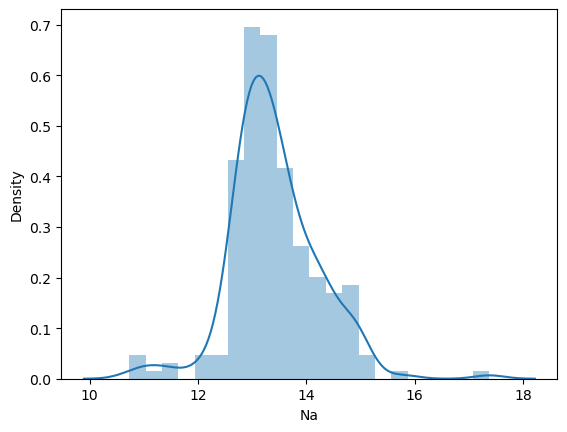

In [38]:
sns.distplot(df['Na'])

<Axes: xlabel='Mg', ylabel='Density'>

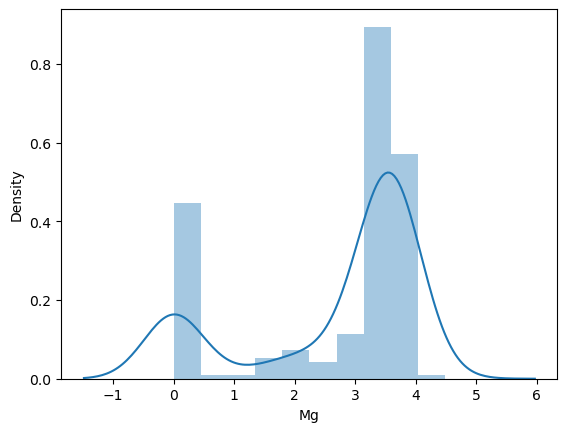

In [39]:
sns.distplot(df['Mg'])

<Axes: xlabel='Al', ylabel='Density'>

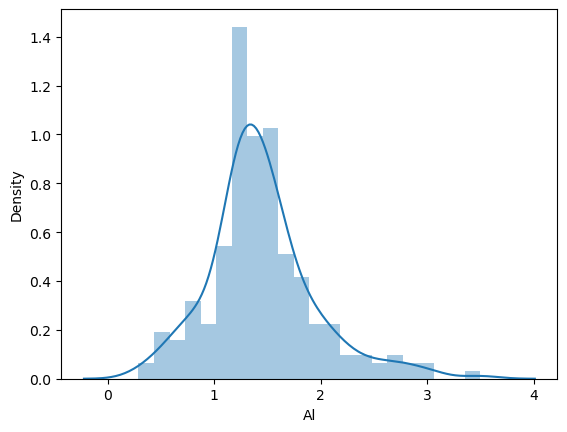

In [40]:
sns.distplot(df['Al'])

<Axes: xlabel='Si', ylabel='Density'>

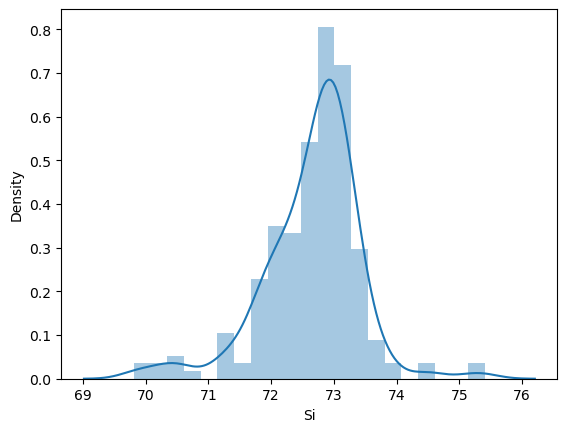

In [41]:
sns.distplot(df['Si'])

<Axes: xlabel='K', ylabel='Density'>

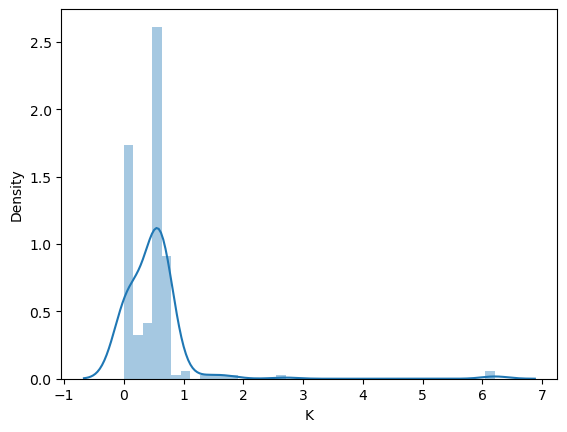

In [42]:
sns.distplot(df['K'])

<Axes: xlabel='Ba', ylabel='Density'>

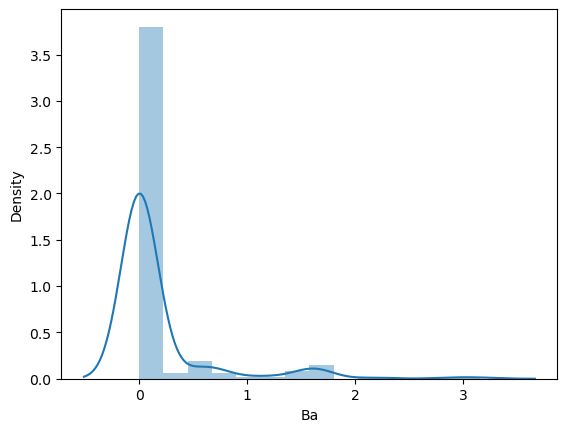

In [43]:
sns.distplot(df['Ba'])

<Axes: xlabel='Ca', ylabel='Density'>

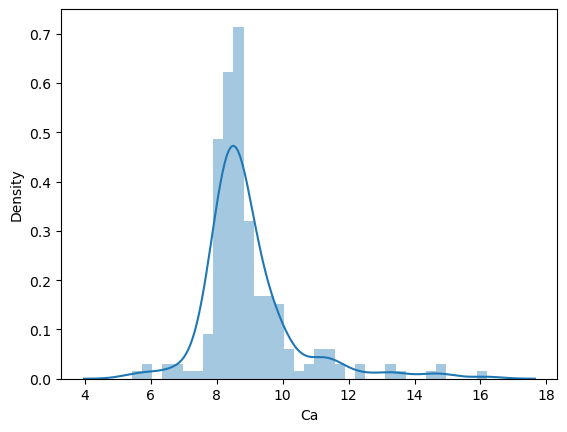

In [45]:
sns.distplot(df['Ca'])

<Axes: xlabel='Fe', ylabel='Density'>

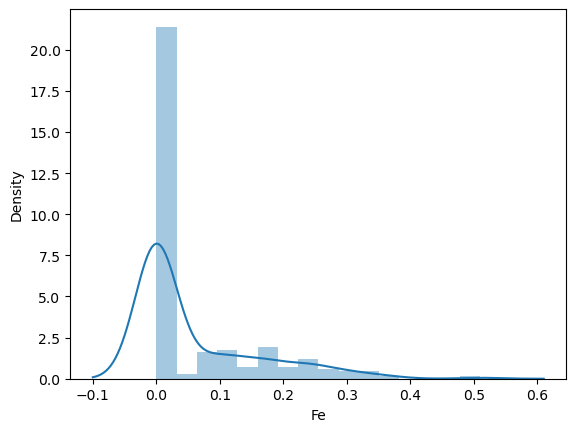

In [46]:
sns.distplot(df['Fe'])

We can see the presence of skewness

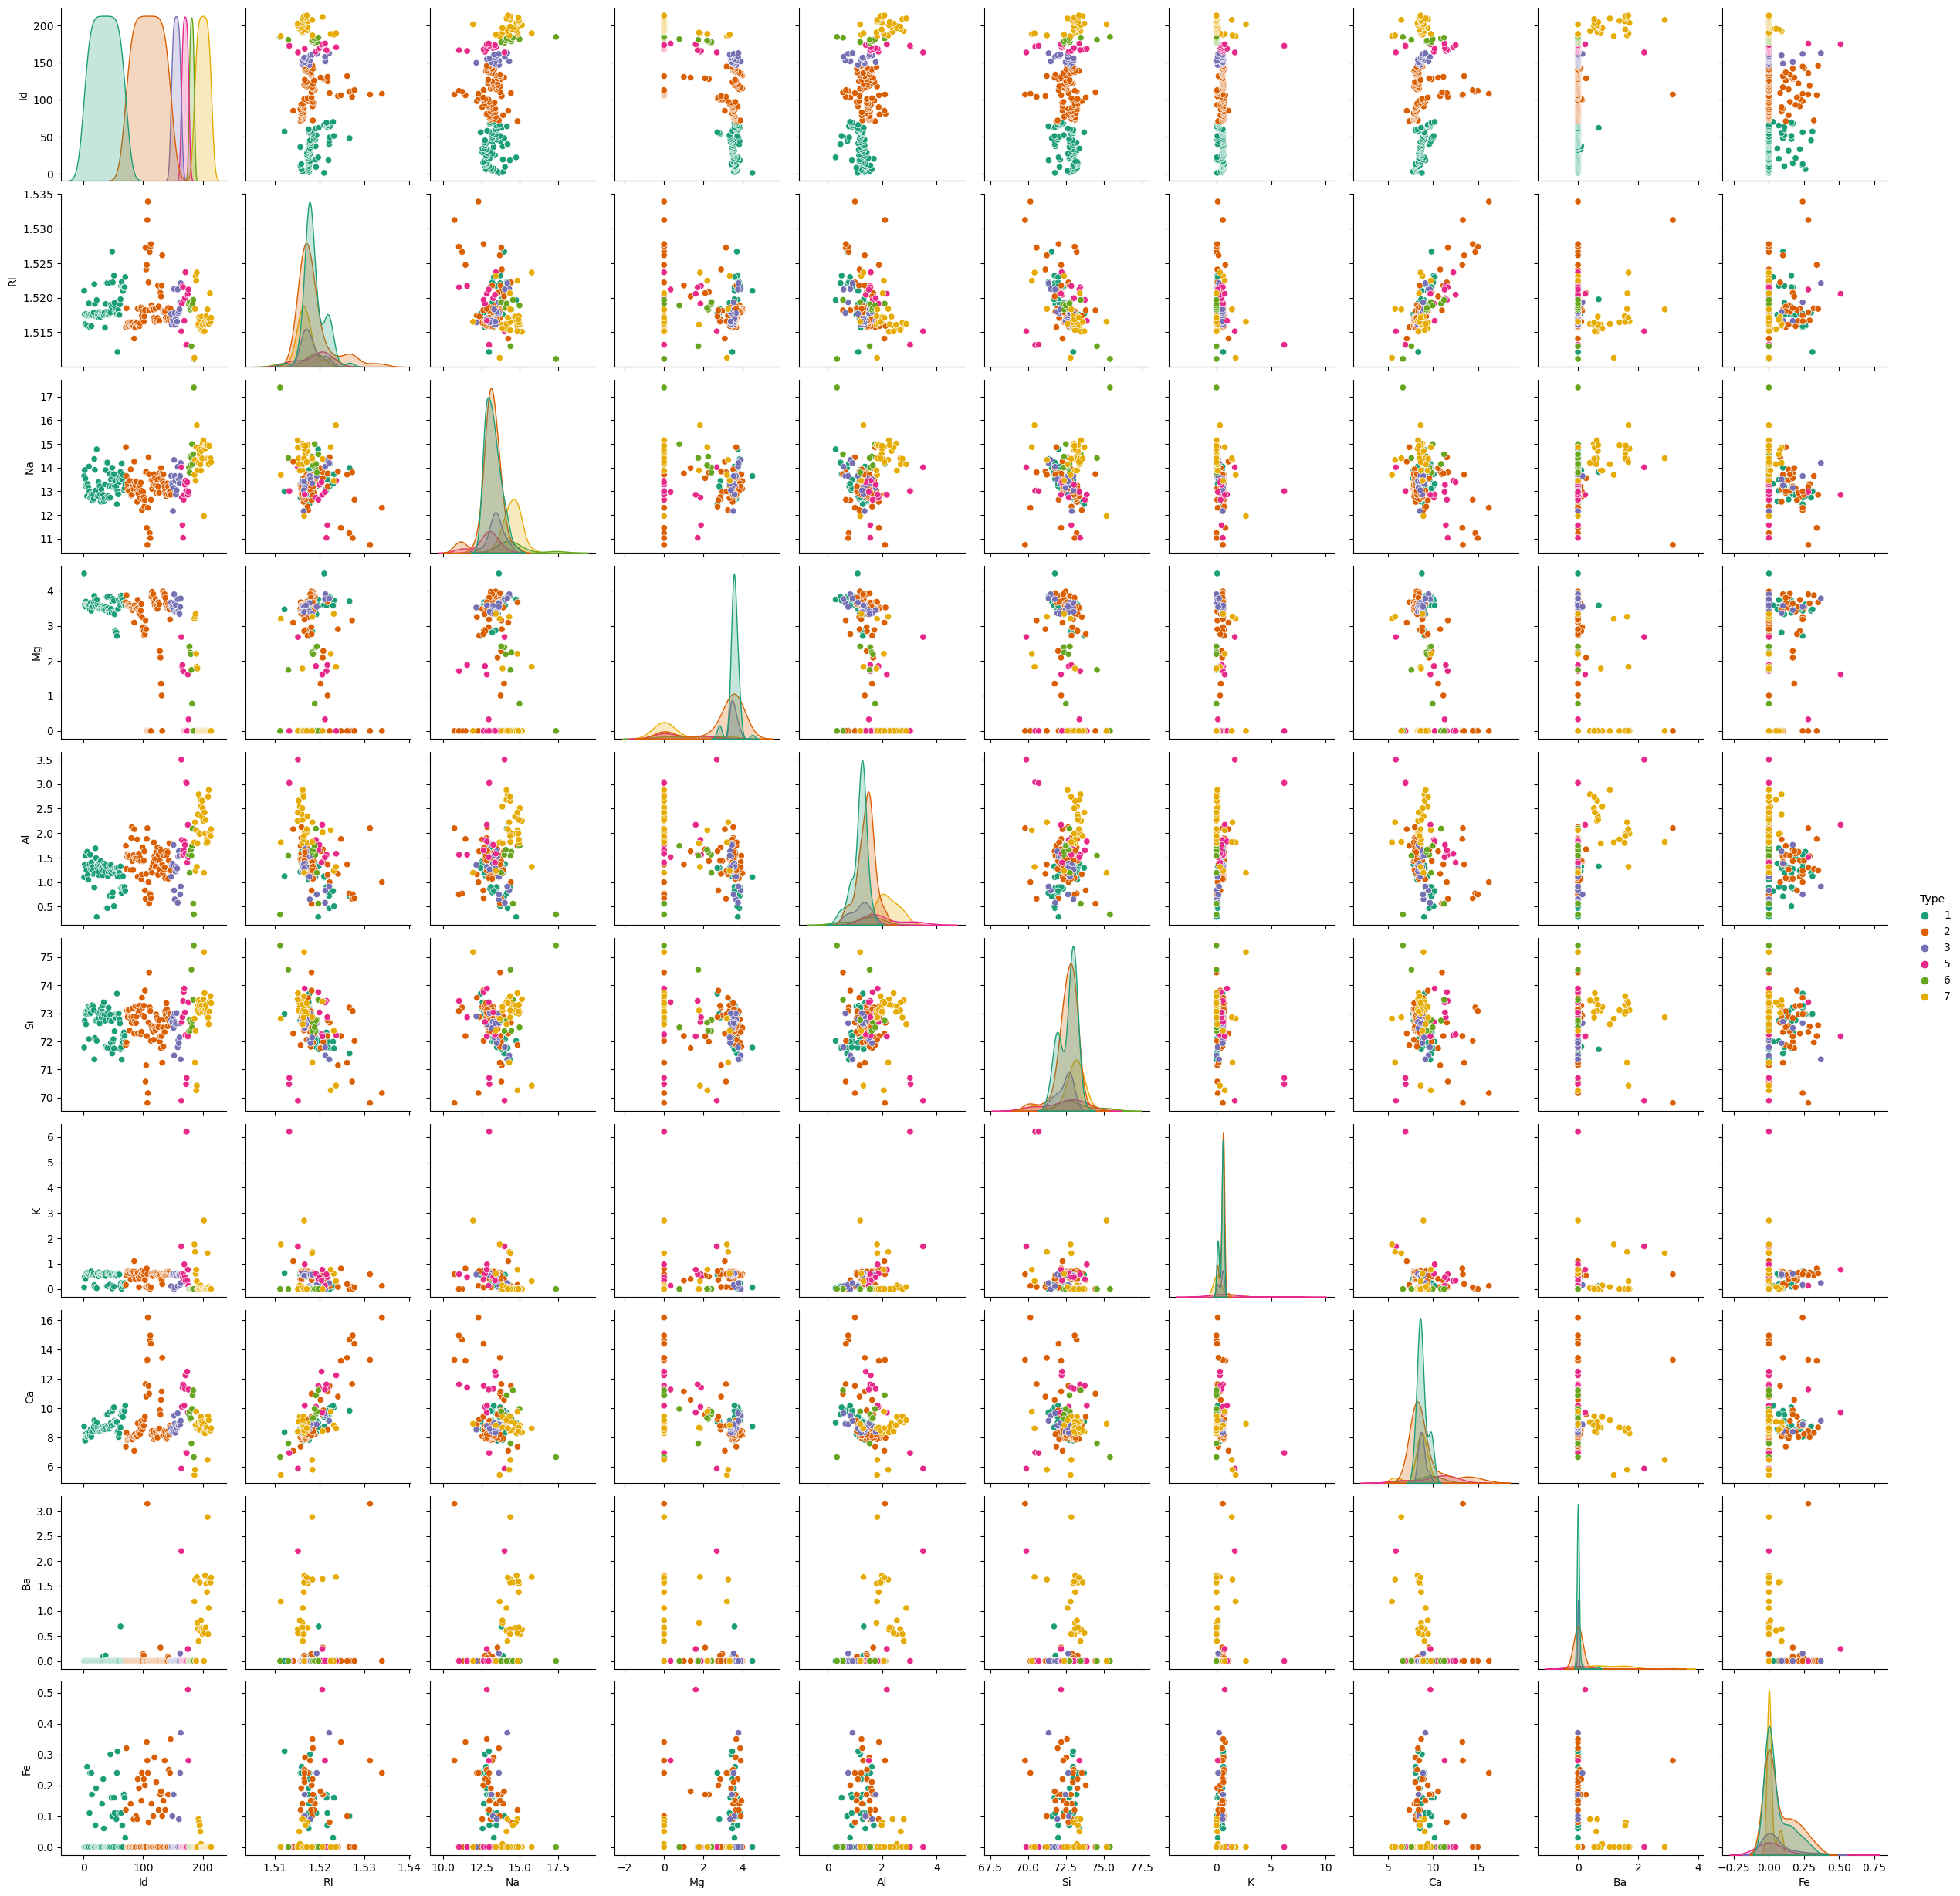

In [48]:
sns.pairplot(df,hue="Type",palette="Dark2")
plt.show()

In [49]:
df.drop('RI',axis=1,inplace=True)

In [50]:
df.drop('Si',axis=1,inplace=True)

In [51]:
df.head()

,Id,Na,Mg,Al,K,Ca,Ba,Fe,Type
0,1,13.64,4.49,1.10,0.06,8.75,0.0,0.0,1
1,2,13.89,3.60,1.36,0.48,7.83,0.0,0.0,1
2,3,13.53,3.55,1.54,0.39,7.78,0.0,0.0,1
3,4,13.21,3.69,1.29,0.57,8.22,0.0,0.0,1
4,5,13.27,3.62,1.24,0.55,8.07,0.0,0.0,1


In [53]:
df.shape

(214, 9)

In [54]:
#removing outliers

In [55]:
z=np.abs(zscore(df))

In [56]:
z

,Id,Na,Mg,Al,K,Ca,Ba,Fe,Type
0,1.723976,0.284953,1.254639,0.692442,0.671705,0.145766,0.352877,0.586451,0.848275
1,1.707788,0.591817,0.636168,0.170460,0.026213,0.793734,0.352877,0.586451,0.848275
2,1.691601,0.149933,0.601422,0.190912,0.164533,0.828949,0.352877,0.586451,0.848275
3,1.675413,0.242853,0.698710,0.310994,0.112107,0.519052,0.352877,0.586451,0.848275
4,1.659226,0.169205,0.650066,0.411375,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...
209,1.659226,0.898681,1.865511,2.881125,0.640968,0.157088,1.783978,0.586451,2.010478
210,1.675413,1.856097,1.865511,1.094342,0.763919,0.392276,2.852405,0.586451,2.010478
211,1.691601,1.168721,1.865511,1.154570,0.763919,0.364103,2.953200,0.586451,2.010478
212,1.707788,1.193270,1.865511,0.993960,0.763919,0.335931,2.812087,0.586451,2.010478


In [57]:
threshold=3
print(np.where(z>3))

(array([105, 106, 106, 106, 107, 110, 111, 112, 131, 145, 162, 163, 163,
       171, 171, 172, 172, 174, 184, 189, 201, 203, 207, 213], dtype=int64), array([5, 1, 5, 6, 5, 5, 5, 5, 5, 7, 7, 3, 6, 3, 4, 3, 4, 7, 1, 6, 4, 6,
       6, 6], dtype=int64))


In [58]:
df=df[(z<3).all(axis=1)]

In [59]:
df

,Id,Na,Mg,Al,K,Ca,Ba,Fe,Type
0,1,13.64,4.49,1.10,0.06,8.75,0.00,0.0,1
1,2,13.89,3.60,1.36,0.48,7.83,0.00,0.0,1
2,3,13.53,3.55,1.54,0.39,7.78,0.00,0.0,1
3,4,13.21,3.69,1.29,0.57,8.22,0.00,0.0,1
4,5,13.27,3.62,1.24,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
208,209,14.37,0.00,2.74,0.00,9.45,0.54,0.0,7
209,210,14.14,0.00,2.88,0.08,9.18,1.06,0.0,7
210,211,14.92,0.00,1.99,0.00,8.40,1.59,0.0,7
211,212,14.36,0.00,2.02,0.00,8.44,1.64,0.0,7


In [ ]:
df.drop('Id',axis=1,inplace=True)

In [81]:
df.shape

(195, 8)

so after removing the outliers we are left with 195 rows and 9 columns

# Modelling

In [82]:
x=df.iloc[:,0:-1]

In [83]:
y=df.iloc[:,-1]

In [84]:
x

,Na,Mg,Al,K,Ca,Ba,Fe
0,13.64,4.49,1.10,0.06,8.75,0.00,0.0
1,13.89,3.60,1.36,0.48,7.83,0.00,0.0
2,13.53,3.55,1.54,0.39,7.78,0.00,0.0
3,13.21,3.69,1.29,0.57,8.22,0.00,0.0
4,13.27,3.62,1.24,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...
208,14.37,0.00,2.74,0.00,9.45,0.54,0.0
209,14.14,0.00,2.88,0.08,9.18,1.06,0.0
210,14.92,0.00,1.99,0.00,8.40,1.59,0.0
211,14.36,0.00,2.02,0.00,8.44,1.64,0.0


In [74]:
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type, Length: 195, dtype: int64

In [85]:
y.value_counts()

1    70
2    68
7    24
3    16
5     9
6     8
Name: Type, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [87]:
from imblearn.over_sampling import SMOTE

In [89]:
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [90]:
y.value_counts()

1    70
2    70
3    70
5    70
6    70
7    70
Name: Type, dtype: int64

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [94]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x # Displaying all the features after applying scaling technique to avoid bias output

,Na,Mg,Al,K,Ca,Ba,Fe
0,0.089867,1.541458,-0.979729,-0.960669,-0.432434,-0.395439,-0.498087
1,0.416580,0.950439,-0.411962,0.446959,-1.227358,-0.395439,-0.498087
2,-0.053887,0.917236,-0.018892,0.145324,-1.270560,-0.395439,-0.498087
3,-0.472079,1.010205,-0.564822,0.748594,-0.890379,-0.395439,-0.498087
4,-0.393668,0.963720,-0.674008,0.681564,-1.019987,-0.395439,-0.498087
...,...,...,...,...,...,...,...
415,1.412202,-1.440198,0.849375,-1.161759,-0.612851,3.622661,0.276721
416,1.052434,-1.440198,2.487078,-1.073898,-0.037126,1.158979,-0.498087
417,1.842828,-1.161262,1.911696,-0.539857,-0.209886,0.705311,-0.498087
418,1.782290,-1.440198,0.766758,-1.161759,-0.559445,3.280782,-0.498087


Training the model

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=21)

I am taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

In [96]:
def classify(model, x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [97]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, x, y)

Accuracy Score: 79.76190476190477

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.56      0.67        16
           2       0.57      0.57      0.57        14
           3       0.53      0.67      0.59        12
           5       1.00      1.00      1.00        12
           6       0.88      1.00      0.93        14
           7       1.00      1.00      1.00        16

    accuracy                           0.80        84
   macro avg       0.80      0.80      0.79        84
weighted avg       0.81      0.80      0.80        84

Cross Validation Score: 74.52380952380952

Accuracy Score - Cross Validation Score is 5.238095238095255


In [98]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)

Accuracy Score: 89.28571428571429

Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.88      0.78        16
           2       0.82      0.64      0.72        14
           3       1.00      0.83      0.91        12
           5       1.00      1.00      1.00        12
           6       0.93      1.00      0.97        14
           7       1.00      1.00      1.00        16

    accuracy                           0.89        84
   macro avg       0.91      0.89      0.90        84
weighted avg       0.90      0.89      0.89        84

Cross Validation Score: 78.57142857142857

Accuracy Score - Cross Validation Score is 10.714285714285722


In [99]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)

Accuracy Score: 86.90476190476191

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.75      0.71        16
           2       0.83      0.71      0.77        14
           3       0.90      0.75      0.82        12
           5       1.00      1.00      1.00        12
           6       0.93      1.00      0.97        14
           7       0.94      1.00      0.97        16

    accuracy                           0.87        84
   macro avg       0.88      0.87      0.87        84
weighted avg       0.87      0.87      0.87        84

Cross Validation Score: 82.3809523809524

Accuracy Score - Cross Validation Score is 4.523809523809518


In [100]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)

Accuracy Score: 79.76190476190477

Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.69      0.71        16
           2       0.75      0.43      0.55        14
           3       0.62      0.83      0.71        12
           5       1.00      1.00      1.00        12
           6       0.74      1.00      0.85        14
           7       1.00      0.88      0.93        16

    accuracy                           0.80        84
   macro avg       0.81      0.80      0.79        84
weighted avg       0.81      0.80      0.79        84

Cross Validation Score: 74.52380952380952

Accuracy Score - Cross Validation Score is 5.238095238095255


In [101]:
model=ExtraTreesClassifier()
classify(model, x, y)

Accuracy Score: 89.28571428571429

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.75      0.75        16
           2       0.79      0.79      0.79        14
           3       1.00      0.83      0.91        12
           5       1.00      1.00      1.00        12
           6       0.93      1.00      0.97        14
           7       0.94      1.00      0.97        16

    accuracy                           0.89        84
   macro avg       0.90      0.89      0.90        84
weighted avg       0.89      0.89      0.89        84

Cross Validation Score: 82.85714285714285

Accuracy Score - Cross Validation Score is 6.428571428571445


The best model here is decision tree classifier

In [106]:
Final_Model = DecisionTreeClassifier(splitter='best', random_state=21)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 89.28571428571429


COnfusion MAtrix

In [109]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

Saving model

In [113]:
import joblib

In [114]:
filename = "Glassidentification.pkl"
joblib.dump(Final_Model, filename)

['Glassidentification.pkl']